# CA1: Dataframe Manipulation with Spotify Data

Group 18

Names:
- Jørgen Asmundvaag
- Ivar Eftedal
- Christopher Strand
- Frederic Strand

## Introduction
Pandas is an extremely powerful tool to handle large amounts of tabular data. In this compulsory assignment, you will use Pandas to explore one of the TA's personal spotify data in depth. \
\
Additional information:
- Feel free to create additional code cells if you feel that one cell per subtask is not sufficient.
- Remember, Pandas uses very efficient code to handle large amounts of data. For-loops are not efficient. If you ever have to use a for-loop to loop over the rows in the DataFrame, you have *probably* done something wrong.
- Label all graphs and charts if applicable.

## Task
I typically enjoy indie and rock music. I am a big fan of everything from old-fashioned rock and roll like Led Zeppelin and Jimi Hendrix, to newer indie artists like Joji and Lana Del Rey. This is why my spotify wrapped for 2023 came as quite a surprise:

<img src="spotifywrapped.PNG" alt="Image Description" width="20%">


Now, I'm no hater of pop music, but this was unexpected. 
For this assignment, you will investigate my listening habits, including a deep dive into my Ariana Grande listening habits, and try to find an answer to why she was my top artist; was there a fault in the spotify algorithm? Am I actually secretly an *Arianator*? (yes, I did have to look that up). Or am I just lying to myself about how often I listen to guilty pleasure music?

## Part 1: Initial loading and exploration

#### 1.0 Import necessary libraries: 
pandas, numpy, matplotlib.pyplot (other libraries such as seaborn or plotly are also allowed if you want prettier plots). It might also be a good idea to use **os** for task 2.0

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import seaborn as sns

#### 1.1 Loading the data
Load the dataset in the file `streaming_history_0.csv` into a Pandas DataFrame called `df_spotify_0`.

In [31]:
df_spotify_0 = pd.read_csv("spotify_data/streaminghistory0.csv")
df_spotify_0.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05,Lorde,Team,8984.0
4,2022-12-06 21:05,Ariana Grande,Into You,1221.0


#### 1.2 Help function
Use the Python command `help` to help you understand how to use the `pd.DataFrame.head` and `pd.DataFrame.tail` methods.

In [32]:
help(pd.DataFrame.head), help(pd.DataFrame.tail)

Help on function head in module pandas.core.generic:

head(self: 'NDFrameT', n: 'int' = 5) -> 'NDFrameT'
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `|n|` rows, equivalent to ``df[:n]``.
    
    If n is larger than the number of rows, this function returns all rows.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal


(None, None)

#### 1.3 Getting an overview
Print the first `five` and last `ten` rows of the dataframe. Have a quick look at which columns are in the dataset. 

In [33]:
df_spotify_0.head(5)

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05,Lorde,Team,8984.0
4,2022-12-06 21:05,Ariana Grande,Into You,1221.0


In [34]:
df_spotify_0.tail(10)

,endTime,artistName,trackName,msPlayed
11949,2023-01-02 20:58,Ariana Grande,six thirty,1699.0
11950,2023-01-02 20:58,Leonard Cohen,Thanks for the Dance,19483.0
11951,2023-01-02 20:59,Des Rocs,Used to the Darkness,185.0
11952,2023-01-02 20:59,Caroline Polachek,Hit Me Where It Hurts,603.0
11953,2023-01-02 20:59,Caroline Polachek,Hit Me Where It Hurts,208.0
11954,2023-01-02 20:59,Kaizers Orchestra,Resistansen,208.0
11955,2023-01-02 20:59,Mr.Kitty,After Dark,101447.0
11956,2023-01-02 20:59,daddy's girl,after dark x sweater weather,301.0
11957,2023-01-02 20:59,daddy's girl,after dark x sweater weather,208.0
11958,2023-01-02 20:59,daddy's girl,after dark x sweater weather,789.0


#### 1.4 Formatting correctly
When working with Pandas, it's very useful to have columns which contains dates in a specific format called *datetime*. This allows for efficient manipulation and analysis of time-series data, such as sorting, filtering by date or time, and resampling for different time periods. Figure out which column(s) would be appropriate to convert to datetime, if any, and if so, perform the conversion to the correct format.

In [35]:
df_spotify_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   endTime     11959 non-null  object 
 1   artistName  11959 non-null  object 
 2   trackName   11959 non-null  object 
 3   msPlayed    11959 non-null  float64
dtypes: float64(1), object(3)
memory usage: 373.8+ KB


In [36]:
df_spotify_0['endTime'] = pd.to_datetime(df_spotify_0['endTime'])
df_spotify_0.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05:00,Lorde,Team,8984.0
4,2022-12-06 21:05:00,Ariana Grande,Into You,1221.0


#### 1.5 Unique artists
Find how many unique artists are in the dataset.


In [37]:
len(df_spotify_0['artistName'].unique())

495

#### 1.6 Unique songs
Find how many unique songs are in the dataset.

In [38]:
len(df_spotify_0['trackName'].unique())

1308

### Part 1: Questions
Q1: Which columns are in the dataset?

endTime,artistName,trackName,msPlayed

Q2: What timeframe does the dataset span?

03.12.2022 -> 02.01.2023

Q3: How many unique artists are in the dataset?

495

Q4: How many unique songs are in the dataset?

1308

## Part 2: Working with all the data

#### 2.0 Importing all the dataframes
In Task 1, you only worked with about a month worth of data. Now, you will work with over a year worth. 

In the *spotify_data* folder, there is more than just one listening record. Load each of the 14 listening records into a dataframe (1 dataframe per listening record), and concatenate them together into one large dataframe named `df`.

In [39]:
data_folder = "spotify_data"

file_list = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith(".csv")]
df_list = [pd.read_csv(file) for file in file_list]
df = pd.concat(df_list, ignore_index=True)

df.head()

,endTime,artistName,trackName,msPlayed
0,2023-07-05 16:31,Rush,Tom Sawyer,2066.0
1,2023-07-05 16:31,Tom Petty,Free Fallin',8195.0
2,2023-07-05 16:31,2Pac,Young Niggaz,19806.0
3,2023-07-05 16:31,2Pac,Young Niggaz,882.0
4,2023-07-05 16:31,Sleeping With Sirens,Better Off Dead,4481.0


#### 2.1 Sorting by time
Datasets often aren't perfect. One example of an issue that could occur is that the time-based data might not be in chronological order. If this were to happen, the rows in your dataframe could be in the wrong order. To ensure this isn't an issue in your dataframe, you should sort the dataframe in chronological order, from oldest to newest.

In [40]:
df = df.sort_values(by = "endTime", ascending=True)
df.head() 

,endTime,artistName,trackName,msPlayed
71767,2022-12-03 02:02,Cigarettes After Sex,Truly,30000.0
71768,2022-12-03 02:02,Leonard Cohen,Take This Waltz - Paris Version,8210.0
71770,2022-12-06 21:05,Lorde,Team,8984.0
71769,2022-12-06 21:05,Vlad Holiday,So Damn Into You,37895.0
71771,2022-12-06 21:05,Ariana Grande,Into You,1221.0


#### 2.2 Setting a timeframe
For this investigation, we are only interested in investigating listening patterns from **2023**. Remove any data not from **2023** from the DataFrame.

In [41]:
df["endTime"] = pd.to_datetime(df["endTime"])

df_2023 = df[df["endTime"].dt.year == 2023]
df_2023.head()

,endTime,artistName,trackName,msPlayed
82655,2023-01-01 01:17:00,Ariana Grande,Right There (feat. Big Sean),22929.0
82654,2023-01-01 01:17:00,Ariana Grande,Santa Baby,12293.0
82653,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",325.0
82650,2023-01-01 01:17:00,Ariana Grande,positions,417.0
82651,2023-01-01 01:17:00,Peach Pit,Being so Normal,2205.0


#### 2.3 Deleting rows
Often in Data Science, you will encounter when a row entry has the value *NaN*, indicating missing data. These entries can skew your analysis, leading to inaccurate conclusions. For this task, identify and remove any rows in your DataFrame that contain NaN values. \
Later in the course, you might encounter other techniques of dealing with missing data, typically reffered to as *data imputation*. Here, though, you are just supposed to delete the entire rows with missing data.

In [42]:
print(f"Before: {df.isna().sum().sum()}")
df = df.dropna(how = 'any', axis=0)
print(f"After: {df.isna().sum().sum()}")

Before: 19
After: 0


#### 2.4 Convert from milliseconds to seconds
From `msPlayed`, create a new column `secPlayed` with the data converted from milliseconds to seconds. Then delete the column `msPlayed`.

In [43]:
df["secPlayed"] = round(df["msPlayed"] / 1000, 1)
df.drop(columns = "msPlayed", inplace=True)
df.head()

,endTime,artistName,trackName,secPlayed
71767,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30.0
71768,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8.2
71770,2022-12-06 21:05:00,Lorde,Team,9.0
71769,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37.9
71771,2022-12-06 21:05:00,Ariana Grande,Into You,1.2


#### 2.5 Finding top 10 favorite artists
Find the top `ten` artists with the highest total play time (in seconds). Plot your findings in a bar graph. \
(hint: start by creating a new DataFrame with only `artistName` and your time column. To proceed, you will also likely need the `groupby` command from Pandas.)

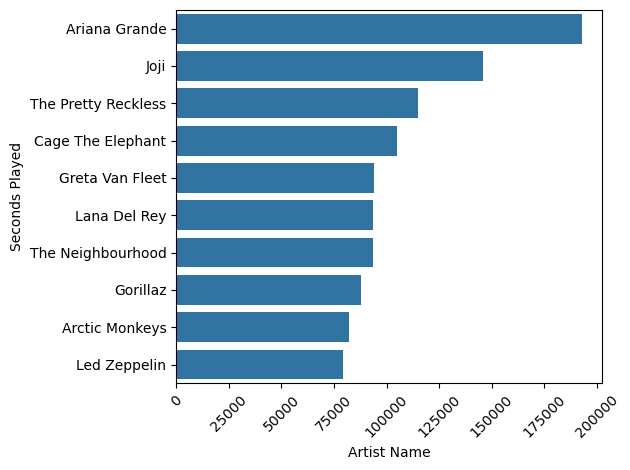

In [44]:
df_sec_artist = df.groupby('artistName')['secPlayed'].sum().reset_index()
df_sec_artist = df_sec_artist.sort_values(by='secPlayed', ascending=False)

sns.barplot(x = 'secPlayed', y = 'artistName', data = df_sec_artist.head(10))

plt.xlabel('Artist Name')
plt.xticks(rotation=45)
plt.ylabel('Seconds Played')
plt.tight_layout()
plt.show()

#### 2.6 Finding top 10 favorite songs
Find the top `ten` songs with the highest play time. Create a graph visualizing the results.

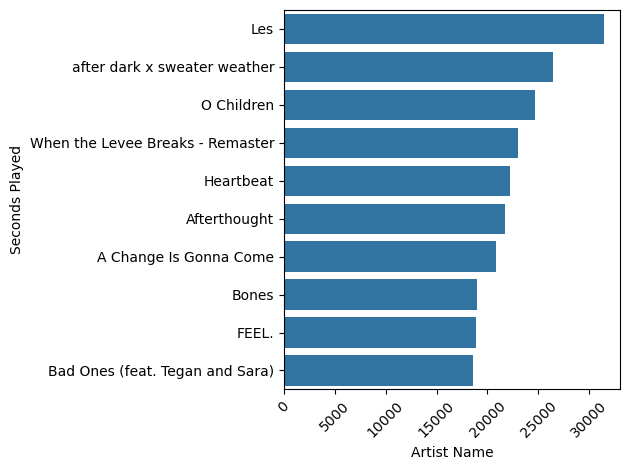

In [45]:
df_sec_track = df.groupby('trackName')['secPlayed'].sum().reset_index()
df_sec_track = df_sec_track.sort_values(by='secPlayed', ascending=False)

sns.barplot(x = 'secPlayed', y = 'trackName', data = df_sec_track.head(10))

plt.xlabel('Artist Name')
plt.xticks(rotation=45)
plt.ylabel('Seconds Played')
plt.tight_layout()
plt.show()


## Part 3: Further analysis

#### 3.0 Average listening time by hour
Generate a plot that displays the average amount of time that music is played for each hour of the day.

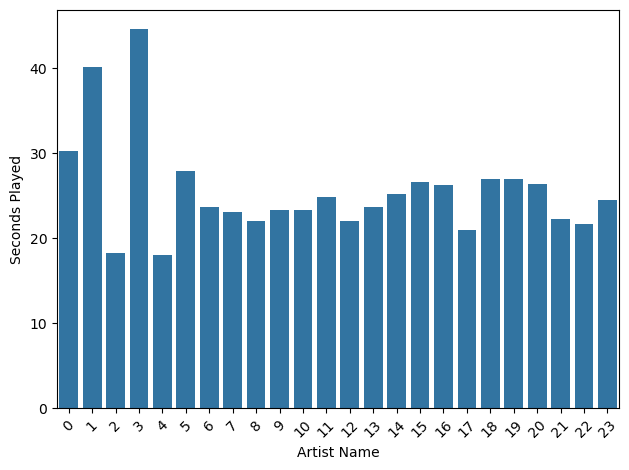

In [46]:
df['hour'] = df['endTime'].dt.hour

df_hour = df.groupby('hour', as_index=False)['secPlayed'].mean()

sns.barplot(x = 'hour', y = 'secPlayed', data = df_hour)

plt.xlabel('Artist Name')
plt.xticks(rotation=45)
plt.ylabel('Seconds Played')
plt.tight_layout()
plt.show()

#### 3.1 Morning music and evening music
I think many people find that some types of music are more suitable for morning listening and some music is more suitable for evening listening. Create a plot that compares the play time of the artists *Leonard Cohen* and *Rage Against the Machine* on an hour-by-hour basis. See if there are any differences.

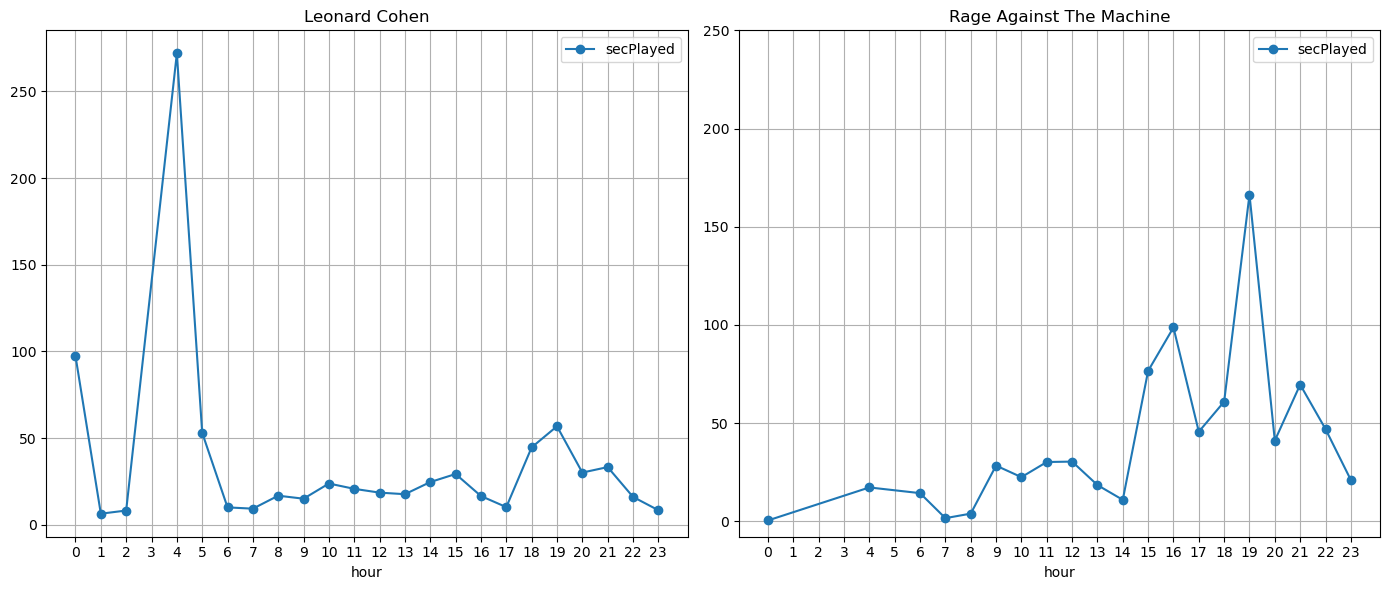

In [70]:
artist_names = ["Leonard Cohen", ]

df['hour'] = df['endTime'].dt.hour
df_leonard = df[df['artistName'] == "Leonard Cohen"]
df_machine = df[df['artistName'] == "Rage Against The Machine"]

df_hour_leonard = df_leonard.groupby('hour', as_index=False)['secPlayed'].mean()
df_hour_machine = df_machine.groupby('hour', as_index=False)['secPlayed'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df_hour_leonard.plot(ax=axes[0], x = 'hour', y = 'secPlayed', kind='line', marker='o')
df_hour_machine.plot(ax=axes[1], x = 'hour', y = 'secPlayed', kind='line', marker='o')

axes[0].set_title('Leonard Cohen')
axes[1].set_title('Rage Against The Machine')

axes[0].grid()
axes[1].grid()

axes[0].set_yticks(np.arange(0, 300, 50))
axes[0].set_xticks(np.arange(0, 24, 1))

axes[1].set_yticks(np.arange(0, 300, 50))
axes[1].set_xticks(np.arange(0, 24, 1))

plt.tight_layout()
plt.show()

#### 3.2 Analysing skipped songs
Determining whether a song was skipped or listened to can be challenging. For this analysis, we'll simplify by defining a skipped song as any track played for less than 30 seconds. Conversely, a song played for 30 seconds or more is considered listened to. \
 Add a column to your DataFrame to reflect this criteria: set the value to 1 if the song was played for less than 30 seconds (indicating a skipped song), and 0 if it was played for 30 seconds or longer.

In [48]:
df["skipped"] = df['secPlayed'] <= 30
df['skipped'] = df['skipped'].astype(int)
df.head()

,endTime,artistName,trackName,secPlayed,hour,skipped
71767,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30.0,2,1
71768,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8.2,2,1
71770,2022-12-06 21:05:00,Lorde,Team,9.0,21,1
71769,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37.9,21,0
71771,2022-12-06 21:05:00,Ariana Grande,Into You,1.2,21,1


#### 3.3 Plotting skipped songs
Create a pie-chart that compares amount of skipped songs to amount of non-skipped songs.

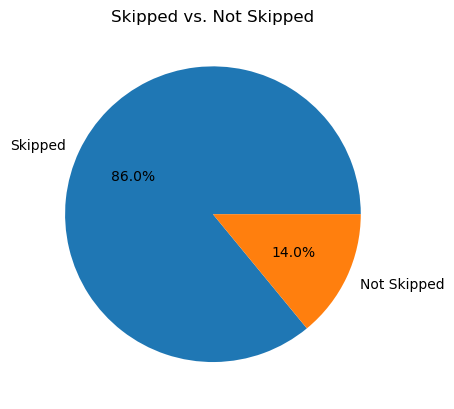

In [73]:
counts = df['skipped'].value_counts()
plt.pie(counts, labels=['Skipped', 'Not Skipped'], autopct='%1.1f%%')
plt.title("Skipped vs. Not Skipped")
plt.show()


#### 3.4 Artists by percentage of songs skipped
For each artist in the dataset, calculate which percentage of their songs was skipped. Store this information in a new DataFrame called `df_skipped`. Store the percentage of skipped songs in a new column named `SkipRate`\
\
**Example**: If an artist has **100** songs in your dataset and **25** of these were skipped, the percentage of skipped songs for this artist would be $\frac{25}{100}=25\%$

In [50]:
df_skipped = df.groupby('artistName', as_index=False).agg(
    SkipRate=('skipped', lambda x: x.sum() / x.count())
)

df_skipped.head()


,artistName,SkipRate
0,10cc,0.655172
1,1930,0.500000
2,2Pac,0.862403
3,3 Doors Down,0.500000
4,4 Non Blondes,0.723881


#### 3.5 Comparing artists by skip-rate 
Find the `three` top artists with the lowest skip-rate and the `three` with the highest. Print their names, along with their skip-rate.

In [51]:
df_skipped = df_skipped.sort_values(by='SkipRate')

df_skipped.head(3)

,artistName,SkipRate
648,Roc Boyz,0.111111
440,LACES,0.133333
72,Basstrologe,0.200000


In [52]:
df_skipped.tail(3)

,artistName,SkipRate
218,Dire Straits,1.0
169,Cocteau Twins,1.0
868,WILLOW,1.0


## Part 4: God Is a Data Scientist - The Ariana Deep-Dive

#### 4.0 Ariana-DataFrame: 
Create a new DataFrame called *df_ariana*, containing only rows with music by Ariana Grande.

In [53]:
df_ariana = df[df['artistName'] == 'Ariana Grande']
df_ariana.head()

,endTime,artistName,trackName,secPlayed,hour,skipped
71771,2022-12-06 21:05:00,Ariana Grande,Into You,1.2,21,1
71776,2022-12-07 00:21:00,Ariana Grande,Best Mistake,8.8,0,1
71782,2022-12-07 00:25:00,Ariana Grande,Just A Little Bit Of Your Heart,0.6,0,1
71784,2022-12-07 00:25:00,Ariana Grande,safety net (feat. Ty Dolla $ign),17.8,0,1
71793,2022-12-07 00:26:00,Ariana Grande,shut up,15.3,0,1


#### 4.1 Average skip rate
Create a histogram of the distribution of the skip-rate values of the different artists in your DataFrame  `df_skipped`, with skip rates on one axis and number of artists on the other. \
\
Then, retrieve the skip rate for Ariana Grande from your DataFrame `df_skipped`. Run the code in the cell below. Where on this distribution does Ariana Grande fall? Do I skip her songs more than average, or less?

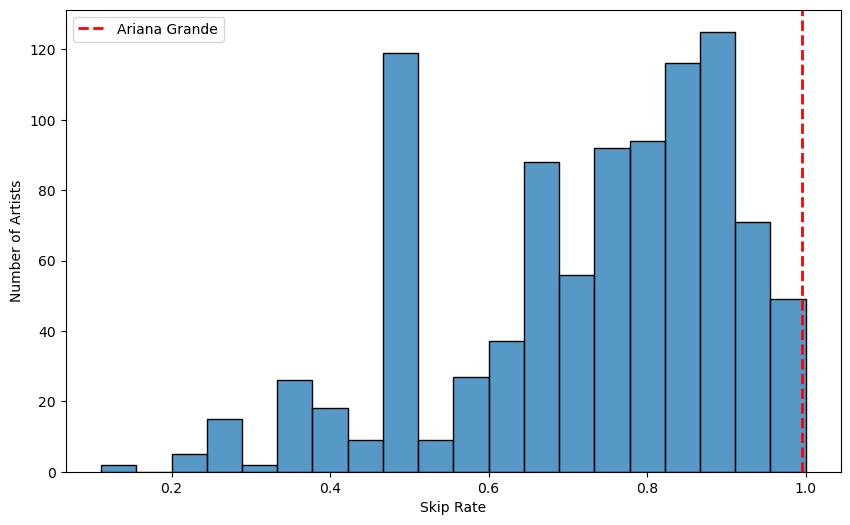

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(df_skipped['SkipRate'], bins=20)

ariana_skip_rate = df_skipped[df_skipped['artistName'] == 'Ariana Grande']['SkipRate'].values[0]

plt.axvline(ariana_skip_rate, color='red', linestyle='dashed', linewidth=2, label="Ariana Grande")

plt.xlabel("Skip Rate")
plt.ylabel("Number of Artists")
plt.legend()
plt.show()

In [55]:
average_skip_rate = df_skipped['SkipRate'].mean()
ariana_skip_rate = df_skipped[df_skipped['artistName'] == "Ariana Grande"]['SkipRate'].values[0]

print(f"Ariana Grande's: {ariana_skip_rate:.4f}")
print(f"Average skip rate: {average_skip_rate:.4f}")

Ariana Grande's: 0.9952
Average skip rate: 0.7234


### Part 4: Questions
Q1: Did I skip a lot of Ariana Grande's songs, or did I not, compared to the rest of the dataset? \

You almost always skipped Ariana Grande, which a rate of 99,5% but an average of 72,3%.

Q2: What might be some possible reasons for Ariana Grande to be my nr.1 artist?

1. Even through you skip her songs a lot, you can still listen to her up to 29 seconds and it will still be marked as skipped. This will generate a lot of seconds, but still maintain a high skip rate.*
2. She's a great artist